Here is the python version used as well as the requirements. I advise running a virtual env so you don't clutter your system wide install:

    python3 -m venv .env && source .env/bin/activate && pip install -r requirements.txt
    
    
 Below is the output for `cat requirements.txt` as well as the python version:


#requirements.txt

bokeh==0.12.15

ipython==6.3.0

jupyter==1.0.0

matplotlib==2.2.2

numpy==1.14.2

pandas==0.22.0

scikit-learn==0.19.1

scipy==1.0.1

seaborn==0.8.1

xlrd==1.1.0

mplleaflet==0.0.5

In [1]:
#!python --version Python 3.6.4
import sys
sys.version # 3.6.4 (default, Jan  5 2018, 02:35:40) \n[GCC 7.2.1 20171224]

'3.6.4 (default, Jan  5 2018, 02:35:40) \n[GCC 7.2.1 20171224]'

# Exercise below:

* I opted for a class-based implementation because I needed to save states for the hover annotations to work.
* The hover reaction is a little sluggish, I believe it's due to the for-loops used. If you know a way to make them better, please share!

<IPython.core.display.Javascript object>


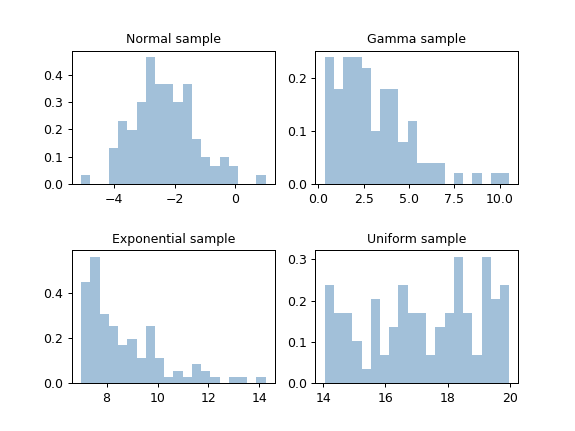

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.animation as animation

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

class Distributions:
    fig = None
    gspec = None
    
    normal = None
    gamma = None
    exponential = None
    uniform = None
    anim = None
    n = 100
    X1 = np.random.choice(x1, 100)
    X2 = np.random.choice(x2, 100)
    X3 = np.random.choice(x3, 100)
    X4 = np.random.choice(x4, 100)
    def __init__(self):
        self.fig = plt.figure()
        self.gspec = GridSpec(2, 2, self.fig)
        self.gspec.update(hspace=0.5)

        self.normal = plt.subplot(self.gspec[0,0])
        self.gamma = plt.subplot(self.gspec[0,1])
        self.exponential = plt.subplot(self.gspec[1,0])
        self.uniform = plt.subplot(self.gspec[1,1])
        
        self.normal.hist(self.X1, density=True, bins=20, alpha=0.5)
        self.gamma.hist(self.X2, density=True, bins=20, alpha=0.5)
        self.exponential.hist(self.X3, density=True, bins=20, alpha=0.5)
        self.uniform.hist(self.X4, density=True, bins=20, alpha=0.5)
        
        self.anim = animation.FuncAnimation(self.fig, self.update, interval=100, blit=True)
        
    def update_annot(self, x, y, subp, value):
        if subp == 'n':
            annot = self.nanot
        elif subp == 'g':
            annot = self.ganot
        elif subp == 'e':
            annot = self.enot
        elif subp == 'u':
            annot = self.unot
        annot.xy = (x, y)
        text = '{}'.format(round(value, 4))

        annot.set_text(text)
        annot.set_visible(True)

    def hover(self, event):
        if event.inaxes == self.normal:
            subp = 'n'
            ax = self.normal
        elif event.inaxes == self.gamma:
            subp = 'g'
            ax = self.gamma
        elif event.inaxes == self.exponential:
            subp = 'e'
            ax = self.exponential
        elif event.inaxes == self.uniform:
            subp = 'u'
            ax = self.uniform
        patches = ax.patches
        bboxes = [n.get_bbox() for n in patches]
        for box in bboxes:
            Y = event.ydata
            X = event.xdata
            if X > box.x0 and X < box.x1 and Y > box.y0 and Y < box.y1:
                patch = patches[bboxes.index(box)]
                patch.set_alpha(1)
                val = patch.get_bbox().get_points()[0][0]
                self.update_annot(X, Y, subp, val)
                self.fig.canvas.draw_idle()
                return
        for patch in patches:
            patch.set_alpha(0.5)
            self.hide_annots()
            self.fig.canvas.draw_idle()
    
    def hide_annots(self):
        self.nanot.set_visible(False)
        self.ganot.set_visible(False)
        self.enot.set_visible(False)
        self.unot.set_visible(False)
        
    def update(self, curr):
        if curr == self.n:
            self.anim.event_source.stop()
            self.hover_hook()
            return
        self.normal.cla()
        self.gamma.cla()
        self.exponential.cla()
        self.uniform.cla()
        self.normal.set_title('Normal sample', fontsize=10)
        self.gamma.set_title('Gamma sample', fontsize=10)
        self.exponential.set_title('Exponential sample', fontsize=10)
        self.uniform.set_title('Uniform sample', fontsize=10)
        self.normal.hist(self.X1[:curr], density=True, bins=20, alpha=0.5, facecolor='steelblue')
        self.gamma.hist(self.X2[:curr], density=True, bins=20, alpha=0.5, facecolor='steelblue')
        self.exponential.hist(self.X3[:curr], density=True, bins=20, alpha=0.5, facecolor='steelblue')
        self.uniform.hist(self.X4[:curr], density=True, bins=20, alpha=0.5, facecolor='steelblue')

    def hover_hook(self):
        self.nanot = self.normal.annotate('', xy=(0,0), xytext=(10,10),
                                          textcoords='offset points',
                                          bbox=dict(boxstyle='round', fc='w'),
                                          arrowprops=dict(arrowstyle='->'))
        self.ganot = self.gamma.annotate('', xy=(0,0), xytext=(10,10),
                                          textcoords='offset points',
                                          bbox=dict(boxstyle='round', fc='w'),
                                          arrowprops=dict(arrowstyle='->'))
        self.enot = self.exponential.annotate('', xy=(0,0), xytext=(10,10),
                                          textcoords='offset points',
                                          bbox=dict(boxstyle='round', fc='w'),
                                          arrowprops=dict(arrowstyle='->'))
        self.unot = self.uniform.annotate('', xy=(0,0), xytext=(10,10),
                                          textcoords='offset points',
                                          bbox=dict(boxstyle='round', fc='w'),
                                          arrowprops=dict(arrowstyle='->'))
        self.nanot.set_visible(False)
        self.ganot.set_visible(False)
        self.enot.set_visible(False)
        self.unot.set_visible(False)
        self.fig.canvas.mpl_connect('motion_notify_event', self.hover)
        plt.savefig('updating_annotations.png')
        
d = Distributions()


In [5]:
d.fig.get_children()